<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/MNA_IAyAA_semana_8_Actividad_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Adrián Alejandro Dávila González - A01039334
*   Juan Antonio Melendres Villa - A00369017
*   Andrea Margarita Osorio González - A01104776
*   Rodrigo Ildefonso Román Guzmán - A01794225
*   Jeanette Ríos Martínez - A01688888


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import requests
import io

#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter 


#Preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer

#Modelos
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import cross_validate, RepeatedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


#Evaluacion
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay  
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve, validation_curve


#**Ejercicio-1.** 

Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.

In [2]:
#Cargamos la base de datos desde un vinculo a google drive que esta abierto al publico en general
url= 'https://drive.google.com/file/d/1qxwolNUyC93rdK4Lctt0QM14oOtP_UWO/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
response = requests.get(path)
contents = response.text
lineas = contents.split('\n')
data = pd.read_csv(io.StringIO('\n'.join(lineas)), sep=' ', header='infer')

#Definimos los nombres genericos que utilizaremos para las caracteristicas que por si mismas
#no tenian por motivos de privacidad de los usuarios
names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']

data.columns = names
data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
5,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
6,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
7,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
8,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0
9,1,33.50,1.750,2,14,8,4.500,1,1,4,1,2,253,858,1


In [3]:
#Separación de variables y generación de dataframes de predictores y respuesta
names_independent = names[:-1]
name_target = names[-1]


<h3><b>Variables Categóricas y Numéricas</b></h3>

De acuerdo a la información de la página de la UCI las siguientes 8 variables de entrada son las categóricas:

A1 (binaria), A4 (3 niveles), A5 (14 niveles), A6 (9 niveles), A8 (binaria), A9 (binaria), A11 (binaria), A12 (3 niveles).

El resto de las 6 variables de entrada las definen como numéricas continuas:

A2, A3, A7, A10, A13, A14.



In [4]:
#Realizamos la division de los nombres de variables categoricas y numericas

#Variables categoricas
names_categorical = ['A1' , 'A4' , 'A5' , 'A6' , 'A8' , 'A9' , 'A11' , 'A12' ]

#Variables numericas
names_numerical = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

Con el fin de simplificar el análisis de preparación de los datos visualizamos que varios de los niveles de las variables <i><b>categóricas</b></i> tienen muy bajas frecuencias. Para esto hacemos un analisis de las variables de cada caracteritica.

In [5]:
for i in names_categorical:
  print('\nPorcentaje de valores en : ',i)
  value_counts = data[i].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' #representamos la distribucion de valores con porcentajes
  print(value_counts)


Porcentaje de valores en :  A1
1    67.8%
0    32.2%
Name: A1, dtype: object

Porcentaje de valores en :  A4
2    76.1%
1    23.7%
3     0.3%
Name: A4, dtype: object

Porcentaje de valores en :  A5
8     21.2%
11    11.3%
9      9.3%
3      8.6%
6      7.8%
1      7.7%
4      7.3%
13     6.0%
14     5.5%
7      5.5%
2      4.4%
10     3.6%
5      1.5%
12     0.4%
Name: A5, dtype: object

Porcentaje de valores en :  A6
4    59.1%
8    20.0%
5     8.6%
1     8.3%
3     1.2%
9     1.2%
2     0.9%
7     0.9%
Name: A6, dtype: object

Porcentaje de valores en :  A8
1    52.4%
0    47.6%
Name: A8, dtype: object

Porcentaje de valores en :  A9
0    57.2%
1    42.8%
Name: A9, dtype: object

Porcentaje de valores en :  A11
0    54.3%
1    45.7%
Name: A11, dtype: object

Porcentaje de valores en :  A12
2    90.6%
1     8.3%
3     1.2%
Name: A12, dtype: object


Algunas columnas tienen muy pocos registros, lo caul impide hacer culaquier inferencia. Por ello agruparemos a continuación algunos de los niveles más bajos bajo el criterio de que al menos cada nivel en cada factor tenga al menos un 5% de información.

In [6]:
#Por lo tanto realizaremos una agrupacion de los datos con menor ocurrencia
data['A4'] = data['A4'].map({2:2, 1:0, 3:0})
data['A5'] = data['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
data['A6'] = data['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})

In [7]:
#Definamos nuestras variables de entrada y de salida
X = data[names[:-1]]
y = data[[names[-1]]]

# Realizamos la particion de los datos
# Conjunto de entrenamiento en 85% 
# Conjunto de prueba en 15%
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.15,stratify=y, shuffle= True,random_state =0)
print('\033[1m' + 'Forma de X_train_v:' + '\033[0m', X_train_v.shape)
print('\033[1m' + 'Forma de y_train_v:' + '\033[0m', y_train_v.shape)
print('\033[1m' + 'Forma de X_test:' + '\033[0m', X_test.shape)
print('\033[1m' + 'Forma de y_test:' + '\033[0m', y_test.shape)

Forma de X_train_v: (585, 14)
Forma de y_train_v: (585, 1)
Forma de X_test: (104, 14)
Forma de y_test: (104, 1)


#**Ejercicio-2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información

Revisamos la proporcion de las clases

In [8]:
y_train_v.sum() / y_train_v.shape[0]

class    0.446154
dtype: float64

Las clases estan distribuidas en
44.5
%
 y 
55.5
%. Por lo tanto estamos con un problema de clases balanceadas

Realizamos analisis de la distribucion de nuestros datos numericos para darnos una idea de que tipo de transformacion podemos hacer

689


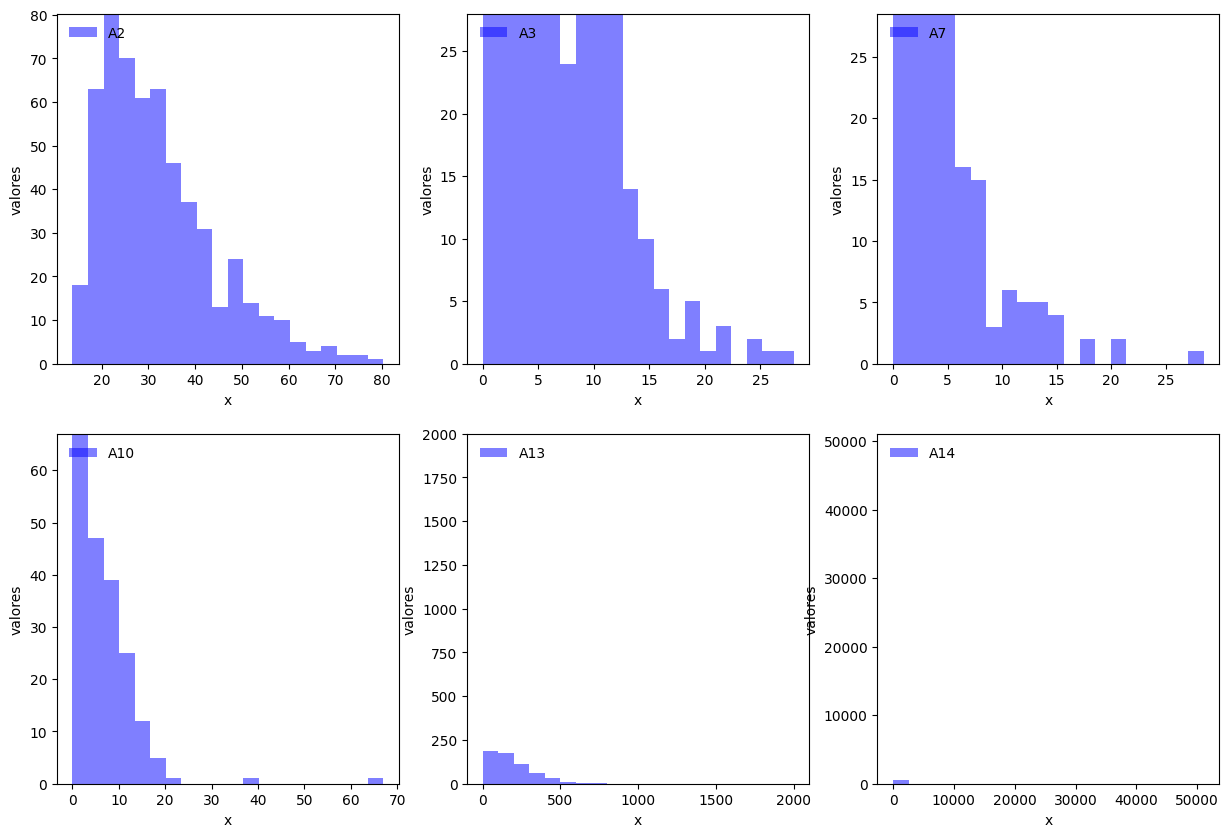

In [9]:
# Graficamos la distribucion de cada variable en graficas de barras

# Definimos el numero de columnas e hileras de de acuerdo con nuestra cantidad 
# de datos
ncols = 3
nrows = int(np.ceil(len(names_numerical) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

print(len(data[names_numerical[0]]))
# indice de la grafica
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Graficamos los datos 
        if counter < len(names_numerical):

            ax.hist(X_train_v[names_numerical[counter]], bins=20, color='blue', alpha=0.5, label='{}'.format(names_numerical[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('valores')
            ax.set_ylim([0,X_train_v[names_numerical[counter]].max()])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
plt.show()

Notamos que casi todos los datos numericos tienen un sesgo positivo (hacia el lado izquierdo). Por lo tanto podemos aplicar una funcion para ayudar a que los datos tengan una distribucion mas Gaussiana.

In [10]:
# Definimos una funcion para transformar datos con log
def log_transform(X):
    return np.log1p(X) 

Definimos nuestro Pipeline dividiendo las variables categoricas y las numericas

In [11]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2))),
                                 ('log', FunctionTransformer(log_transform))
                                 ])   
num_pipeline_nombres = names_numerical

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = names_categorical

# Realizamos OneHotEncoding algunas de nuestras variables categoricas
# Dejaremos fuera las binarias ya que es redundante el aplicarles OneHotEncoding
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop=None, handle_unknown='ignore'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
preprocessor = ColumnTransformer(transformers = [('numpipe', num_pipeline, names_numerical),
                                                        ('catimp', catImp_pipeline, names_categorical),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numpipe',
                                 Pipeline(steps=[('impMediana',
                                                  SimpleImputer(strategy='median')),
                                                 ('escalaNum',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2))),
                                                 ('log',
                                                  FunctionTransformer(func=<function log_transform at 0x7fccbe2765f0>))]),
                                 ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']),
                                ('catimp',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11',
                                  'A12']),
                                ('catohe',
                                 Pipeline(steps=[('OneHotE',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['A4', 'A5', 'A6', 'A12'])])

#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

In [12]:
#Realizamos la particion de los datos de entrenamiento y validacion
X_train, X_val, y_train, y_val = train_test_split(X_train_v, y_train_v, test_size=0.2, shuffle=True)

print('\033[1m' + 'Forma de X_train:' + '\033[0m', X_train.shape)
print('\033[1m' + 'Forma de y_train:' + '\033[0m', y_train.shape)
print('\033[1m' + 'Forma de X_val:' + '\033[0m', X_val.shape)
print('\033[1m' + 'Forma de y_val:' + '\033[0m', y_val.shape)

Forma de X_train: (468, 14)
Forma de y_train: (468, 1)
Forma de X_val: (117, 14)
Forma de y_val: (117, 1)


In [13]:
#Modelo DummyClassifier

#Fit de los datos de entrenamiento para el modelo DummyRegressor
X_train_transformed =preprocessor.fit_transform(X_train)

#Modelo DummyClassifier
model_DR= DummyClassifier(strategy='stratified')
model_DR.fit(X_train_transformed, y_train)

#Transformamos los datos de validacion con el preprocesador previamente definido
X_val_transformed= preprocessor.transform(X_val)

# Realizamos las predicciones
y_hat_DR_train=  model_DR.predict(X_train_transformed)
y_hat_DR_validate=  model_DR.predict(X_val_transformed)

#Calculamos los errores con las metricas accuracy_score, f1_score, precision_score y recall_score 
#importadas de la libreria sklearn.metrics 

accuracy_score_train = accuracy_score(y_train, y_hat_DR_train)
accuracy_score_val = accuracy_score(y_val, y_hat_DR_validate)

f1_score_train = f1_score(y_train, y_hat_DR_train)
f1_score_val = f1_score(y_val, y_hat_DR_validate)

precision_score_train = precision_score(y_train, y_hat_DR_train)
precision_score_val = precision_score(y_val, y_hat_DR_validate)

recall_score_train = recall_score(y_train, y_hat_DR_train)
recall_score_val = recall_score(y_val, y_hat_DR_validate)


# Imprimir los errores accuracy_score, f1_score, precision_score, recall_score importadas
# de la libreria sklearn.metrics 
print('\033[1m' + "Accuracy en entrenamiento:" + '\033[0m', accuracy_score_train)
print('\033[1m' + "Accuracy en validación:" + '\033[0m', accuracy_score_val)
print('\033[1m' + "F1 en entrenamiento:" + '\033[0m', f1_score_train)
print('\033[1m' + "F1 en validación:" + '\033[0m', f1_score_val)
print('\033[1m' + "Precision en entrenamiento:" + '\033[0m', precision_score_train)
print('\033[1m' + "Precision en validación:" + '\033[0m', precision_score_val)
print('\033[1m' + "Recall en entrenamiento:" + '\033[0m', recall_score_train)
print('\033[1m' + "Recall en validación:" + '\033[0m', recall_score_val)

Accuracy en entrenamiento: 0.5235042735042735
Accuracy en validación: 0.5299145299145299
F1 en entrenamiento: 0.4801864801864802
F1 en validación: 0.4329896907216495
Precision en entrenamiento: 0.4660633484162896
Precision en validación: 0.4772727272727273
Recall en entrenamiento: 0.4951923076923077
Recall en validación: 0.39622641509433965


En respuesta a la pregunta de por que es adecuado usar la estrategia 'stratified': Esta estrategia nos permite conservar las proporciones de los datos de entrenamiento. 

#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.

In [14]:
# ++Descripcion de los parametros del modelo SVM:++

#kernel: Determina el tipo de kernel que se utilizara. 
# - 'linear'   es el SVM de grado lineal

# - 'poly'     permite obtener las caracteristicas que de grado polinomial
#              utilizando el producto punto para encontrar distancia entre puntos
#              'degree' determina su nivel de flexibilidad

# - 'rbf'      calcula la distancia entre puntos basado en una distancia radial
#              a partir de un punto de referencia usando una funcion exponencial
#              gamma (γ) determina su nivel de flexibilidad

#C: Un valor pequeño para C conduce a una 'calle' mas amplia pero implica una
#   violacion mayor de los margenes (En tanto que C crece, su regularizacion 
#   tambien aumenta)


#coef0: Aplica para el kernel polynomial y determina que tanto el modelo
#       esta influenciado por polinoios de alto grado vs polinomios de bajo grado

#gamma: Aplica para el kernel RBF. Hacer gamma mas grande amplia la campana y las
#       instancias cercanas a la frontera tienen mayor rango de influencia. 
#       Es otro punto de control para regularizacion

modelo = SVC()

zero_hundreds_vals = np.geomspace(0.1,10,3)

#Definimos una lista de parametros con los que entrenaremos nuestro modelo
#para conocer los mejores parametros por medio de GridSearchCV
param_grid = [
    # {'C': [0.1], 'kernel': ['linear']},
    {'C': zero_hundreds_vals, 'kernel': ['poly'], 'degree': range(1,4,1),'coef0':zero_hundreds_vals},
    {'C': zero_hundreds_vals, 'kernel': ['rbf'], 'gamma': zero_hundreds_vals} 
]

#Realizamos validacion cruzada con 5 divisiones y 3 repeticiones
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

#Definimos las metricas que utilizaremos para evaluar el desempeño del modelo


grid = GridSearchCV(estimator=modelo, 
                    param_grid=param_grid, 
                    cv=cv, 
                    n_jobs = -1,
                    scoring='accuracy')

#Entrenamos la malla
grid.fit(X_train_v, y_train_v['class'])


#Obtención de los mejores parámetros y la mejor respuesta
print('\033[1m' + "Mejores parámetros en la búsqueda de cuadrilla (GridSearchCV):" + '\033[0m', grid.best_params_)
print('\033[1m' + "Mejor puntuación de la búsqueda de cuadrilla (GridSearchCV):" + '\033[0m', grid.best_score_)
print('\033[1m' + 'Métrica utilizada:'+ '\033[0m', grid.scoring)


Mejores parámetros en la búsqueda de cuadrilla (GridSearchCV): {'C': 10.0, 'coef0': 10.0, 'degree': 3, 'kernel': 'poly'}
Mejor puntuación de la búsqueda de cuadrilla (GridSearchCV): 0.7344729344729345
Métrica utilizada: accuracy


Desempeño del modelo con los mejores parametros en las metricas  accuracy_score, f1_score, precision_score, recall_score importadas

In [15]:
#Estas son las metricas que utilizaremos para evaluar nuestro modelo
# con los parametros que resutaron ser los mas optimos
mymetrics =  {'accuracy':make_scorer(accuracy_score),
                  'precision':make_scorer(precision_score),
                  'f1_score':make_scorer(f1_score),
                  'gmean':make_scorer(precision_score),
                  'recall':make_scorer(recall_score)}


#Definición de la variable 'resultados'
resultados=list()


# Uso del preprocesador definido anteriormente 
pipe = Pipeline([
  ('preprocessor', preprocessor),
  ('model', SVC(**grid.best_params_))
])

#Definición del tipo de validacion cruzada a utilizar
kfold= RepeatedKFold(n_splits=5, n_repeats=3)


#Resultados obtenidos por validación cruzada
scores= cross_validate(pipe,
                        X_train_v, np.ravel(y_train_v),
                        scoring= mymetrics,
                        cv= kfold,
                        return_train_score=True,
                        n_jobs=-1,
                        error_score='raise')

#Guardamos los resultados de entrenamiento y de validacion en listas separadas
train_scores = []
val_scores = []
for i in mymetrics:
  train_scores.append(scores['train_'+i])
  val_scores.append(scores['test_'+i])

print('SVC - Entrenamiento')
max_width = max(len(metric) for metric in mymetrics)
for i in mymetrics:
    print('Promedio {:{width}}: {:<10.6f}'.format(i, np.mean(scores['train_'+i]), width=max_width))

print('\nSVC - Validacion')
for i in mymetrics:
    print('Promedio {:{width}}: {:<10.6f}'.format(i, np.mean(scores['test_'+i]), width=max_width))

SVC - Entrenamiento
Promedio accuracy : 0.914245  
Promedio precision: 0.874204  
Promedio f1_score : 0.907584  
Promedio gmean    : 0.874204  
Promedio recall   : 0.943759  

SVC - Validacion
Promedio accuracy : 0.851852  
Promedio precision: 0.810454  
Promedio f1_score : 0.838919  
Promedio gmean    : 0.810454  
Promedio recall   : 0.871617  


#**Ejercicio-5.**

 Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones.

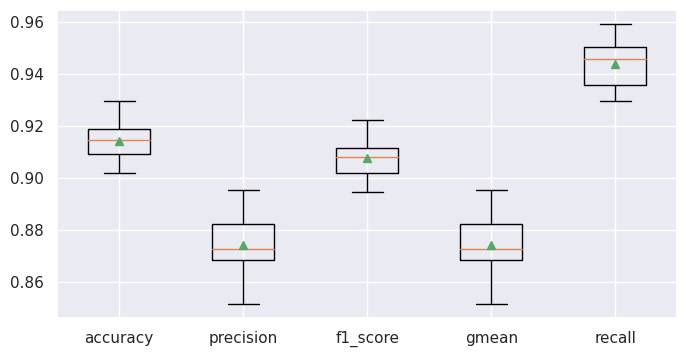

In [16]:
#Desplegamos el diagrama de las diferentes metricas con los datos de entrenamiento
sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(train_scores, labels=list(mymetrics.keys()), showmeans=True)

plt.show()

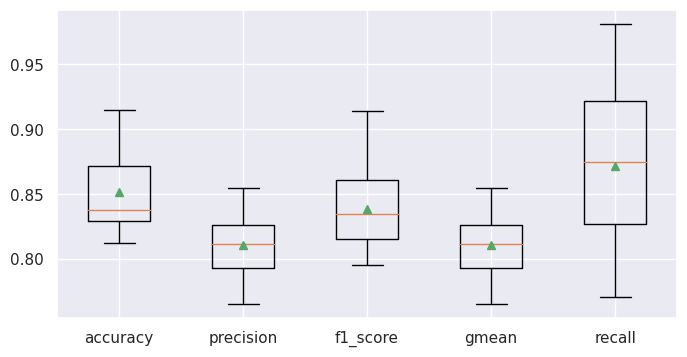

In [17]:
#Desplegamos el diagrama de las diferentes metricas con los datos de prueba
sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(val_scores, labels=list(mymetrics.keys()), showmeans=True)

plt.show()

#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas.

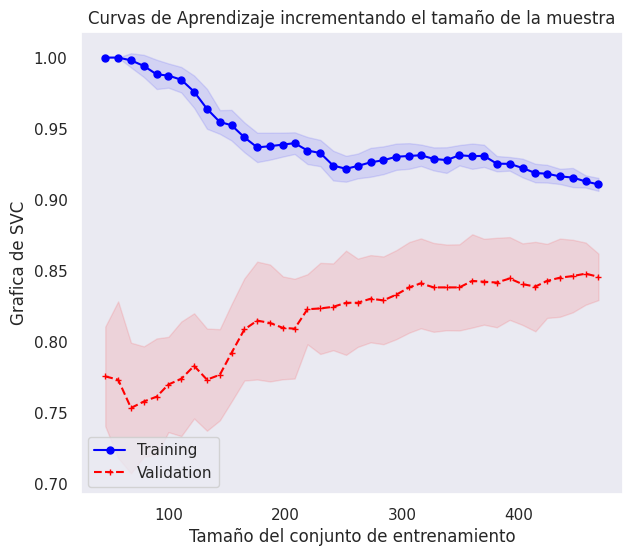

In [18]:
#Curvas de Aprendizaje incrementando el tamaño de la muestra de los datos

#Definición del delta incremental de entrenamiento para la curva de aprendizaje
delta_train_sz = np.linspace(0.1,1,40)

#Definición de las particiones en el conjunto de entrenamiento
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) 

#Uso de un pipeline con el preprocesador previamente definido y el modelo correspondiente
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(**grid.best_params_))
])

#Cálculo de las curvas de aprendizaje utilizando precision
train_sizes, train_scores, val_scores = learning_curve(estimator = pipe_svc,    
                                                X = X_train_v,
                                                y = y_train_v.values.ravel(),
                                                cv =  kfold,
                                                train_sizes = delta_train_sz,
                                                scoring = mymetrics['accuracy'],
                                                random_state=11)


#Graficado de curvas de aprendizaje
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Grafica de las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
plt.figure(figsize=(7,6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

#Documentación relacionada a características de la gráfica
plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Grafica de SVC')
plt.grid()
plt.legend(loc='lower left')
plt.show()


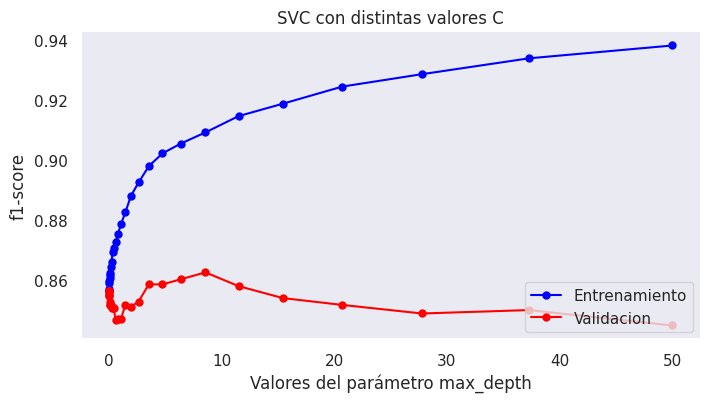

In [19]:
#Debido a que el modelo tiene mejores resultados con el kernel polinomial
#vamos a comparar su desempeño con una variacion del parametro C

#Definición del rango del parametro C
c_values = np.geomspace(0.01,50,30)


#Definición del modelo a utilizar
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(**grid.best_params_))
])


#Definición de las particiones en el conjunto de entrenamiento
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=11) 

#Cálculo de la curva de validación utilizando f1-score
train_scores, valid_scores = validation_curve(pipe_svc, 
                                              X_train_v,
                                              y_train_v.values.ravel(),
                                              param_name="model__C", 
                                              param_range=c_values,
                                              cv=kfold,
                                              scoring='accuracy')

#Definición de cálculos a partir de los datos obtenidos
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Curva de entrenamiento:
plt.plot(c_values, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')


# Curva de validación:
plt.plot(c_values, valid_mean, color='red', marker='o', markersize=5, label='Validacion')


plt.title('SVC con distintas valores C')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('f1-score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva.

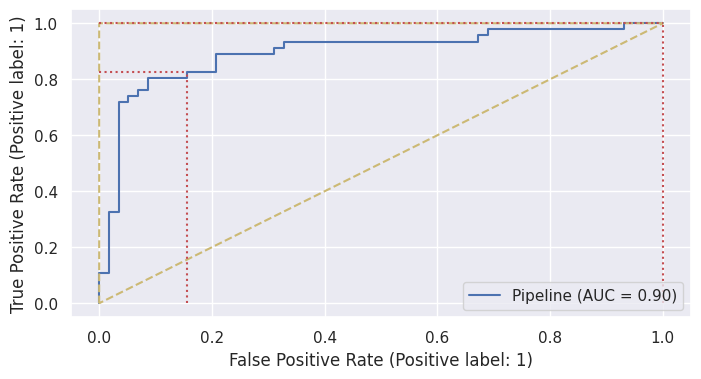

In [30]:
#Usamos el pipeline del modelo SVC con los mejores parametros que utilizamos
#en el ejercicio anterior 
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(**grid.best_params_,probability=True)) # Activamos el metodo de prediccion con probabilidad
])

pipe_svc.fit(X_train_v,y_train_v.values.ravel())

# Obtenemos las predicciones del modelo:
y_hat = pipe_svc.predict(X_test)

# Obtenemos la tasa de falsos positivos (fpr) y la tasa de verdaderos positivos (tpr):
fpr, tpr, _ = metrics.roc_curve(y_test, y_hat)


metrics.RocCurveDisplay.from_estimator(pipe_svc, X_test, y_test)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')

plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')  # como valor predeteminado
plt.show() 

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score.

In [33]:
#Definimos las funciones que nos ayudaran a encontrar el umbral deseado

# TP para umbral deseado
def fun_thTPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)   # shape (231x2)
  my1s = (y['class']==1) 
  pred1s  = p[my1s][:,1]
  return sum(pred1s > th) / sum(my1s)

# Análogo ahora con los FP:
def fun_thFPrate(th, modelo, x, y):   
  p = modelo.predict_proba(x)
  my0s = (y['class']==0) 
  pred0s  = p[my0s][:,1]
  return sum(pred0s>th) / sum(my0s)

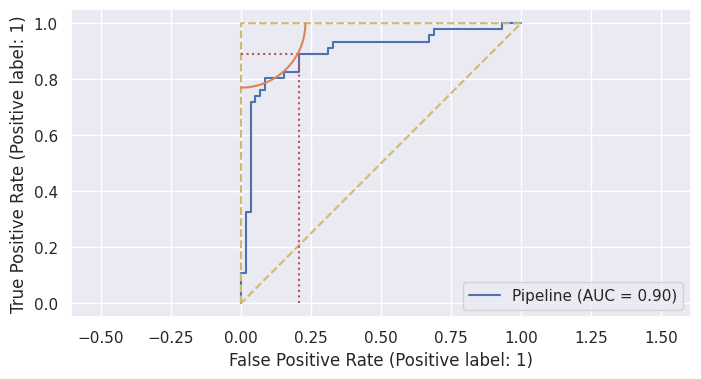

In [43]:

new_th = 0.315 # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.23   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th,pipe_svc, X_test, y_test)
new_FPrate = fun_thFPrate(new_th,pipe_svc, X_test, y_test)

RocCurveDisplay.from_estimator(pipe_svc, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

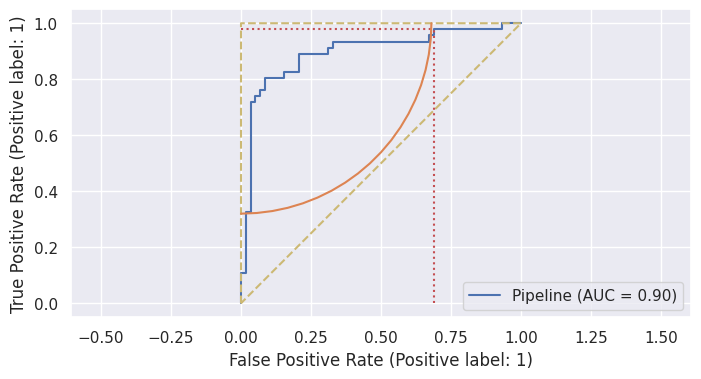

In [56]:
new_th = 0.1 # búsquda del mejor umbral que minimiza el total FP+FN.
rr = 0.68   # búsqueda del mejor radio

new_TPrate = fun_thTPrate(new_th,pipe_svc, X_test, y_test)
new_FPrate = fun_thFPrate(new_th,pipe_svc, X_test, y_test)

RocCurveDisplay.from_estimator(pipe_svc, X_test, y_test)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(new_TPrate, 0, new_FPrate, colors='r', linestyles='dotted')  
plt.vlines(new_FPrate, 0, new_TPrate, colors='r', linestyles='dotted')  

# graficando el pedazo de cícrulo:
an = np.linspace(1.5*np.pi, 2*np.pi, 20)
plt.plot(rr*np.cos(an), rr*np.sin(an)+1)
plt.axis('equal')
plt.show()   

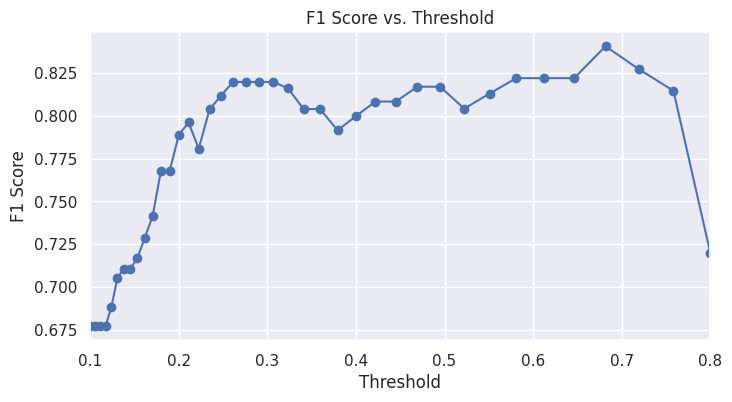

In [45]:
# Graficamos la curva de resultados con la mtrica F1 cambiando el umbral

# Definición del modelo
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(**grid.best_params_,probability=True))
])

# Entrenamos el modelo
pipe_svc.fit(X_train_v,y_train_v.values.ravel())

# Calculamos las probabilidades con el modelo
y_pred_proba = pipe_svc.predict_proba(X_test)[:, 1] 


# Definición del rango del umbral
thresholds = np.geomspace(0.1,0.8,40)


# Calculamos la metrica F1 con cada uno de los umbrales y los guardamos en una lista
f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))  


# graficamos los valores de F1
plt.plot(thresholds, f1_scores, marker='o')

# Etiquetas
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')

# Limites del eje x
plt.xlim(min(thresholds), max(thresholds))


plt.show()

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g- mean.

In [49]:
#Definimos la metrica gmean
def gmean(yreal, ypred):
  vn,fp,fn,vp = confusion_matrix(yreal,ypred).flatten()
  sensitivity, specificity = (vp/(vp+fn),vn/(vn+fp))
  gmean = np.sqrt(sensitivity * specificity)
  return gmean

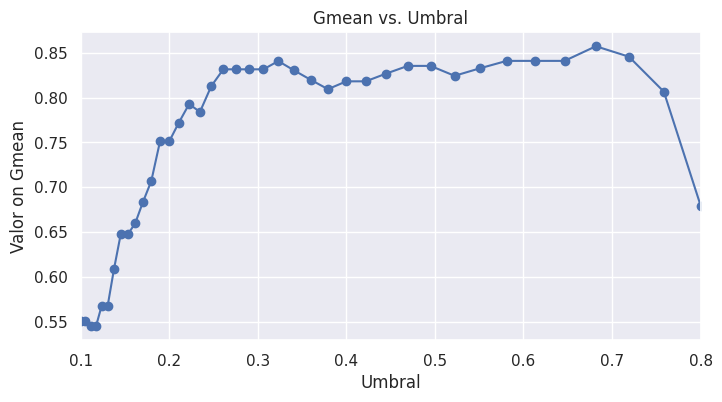

In [50]:
# Graficamos la curva de resultados con umbrales diferentes, ahora con la metrica g-mean.

# Definición del modelo
pipe_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(**grid.best_params_,probability=True))
])

# Entrenamos el modelo
pipe_svc.fit(X_train_v,y_train_v.values.ravel())

# Calculamos las probabilidades con el modelo
y_pred_proba = pipe_svc.predict_proba(X_test)[:, 1] 


# Definición del rango del umbral
thresholds = np.geomspace(0.1,0.8,40)


# Calculamos la metrica Gmean con cada uno de los umbrales y los guardamos en una lista
g_mean_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    g_mean_scores.append(gmean(y_test, y_pred))  


# Graficamos los resultados de Gmean 
plt.plot(thresholds, g_mean_scores, marker='o')

# Etiquetas
plt.xlabel('Umbral')
plt.ylabel('Valor on Gmean')
plt.title('Gmean vs. Umbral')

# limites del eje x
plt.xlim(min(thresholds), max(thresholds))

plt.show()

#**Ejercicio-10.**

In [23]:
None

###**Fin de la Actividad de la semana 8.**